In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from numpy.random import seed
from scipy.stats import kstest
from scipy.stats import ks_2samp
np.random.seed(0)
rng = np.random.default_rng()
from sklearn.metrics.pairwise import cosine_similarity
import statistics
from datetime import datetime
from scipy.stats import skew
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.rcParams.update({'figure.max_open_warning': 0})
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
import cv2
%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [ ]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

## Reading Mobile Dataset ( Whole, Sim & Dissim)

In [ ]:
#importing the CSV file of the dataset from google drive into a dataframe (Eclipse)
df_whole=pd.read_csv('drive/MyDrive/Saner/Dataset/Dataset (Whole-Primary)/mobile_preproccessed_whole_dataset.csv')
df_whole

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Resolution,Updated,Bug Id,Description,Duplicate_Bug_Ids
0,0,1668376,defect,Test failure in dom/base/test/test_window_clos...,GeckoView,General,RESOLVED,FIXED,2020-10-14 03:01:38,1668376,the symptom was that the broadcastchannel me...,NaN
1,1,1631754,defect,PanZoomController erroneously returns INPUT_RE...,GeckoView,General,RESOLVED,FIXED,2020-05-23 04:47:46,1631754,for websites which have their own event handle...,NaN
2,2,1677838,defect,NumberFormatExceptionjava.lang.Integer in pars...,GeckoView,General,RESOLVED,FIXED,2021-01-06 13:28:48,1677838,we are seeing these crash being reported on se...,NaN
3,4,1686100,enhancement,Route Service.onTrimMemory notifications throu...,GeckoView,General,RESOLVED,FIXED,2021-01-12 02:17:23,1686100,since android may send these to the services h...,NaN
4,5,1630229,defect,Crash in [@ java.lang.AssertionError: at org.m...,GeckoView,General,RESOLVED,FIXED,2020-05-28 05:17:09,1630229,this bug is for crash report bp ebbf ...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5315,5499,1683643,defect,Intermittent org.mozilla.geckoview.test.Select...,GeckoView,General,RESOLVED,DUPLICATE,2021-07-30 19:04:17,1683643,filed by rmaries at mozilla com parse...,1682775.0
5316,5500,1649160,defect,Download Feature: unicode RTLO char can fake t...,Firefox for iOS,General,RESOLVED,FIXED,2020-12-18 17:20:48,1649160,created attachment regedt‮gpj exe summary ...,NaN
5317,5501,1514619,defect,Menu options are in different order than new t...,Firefox for iOS,Menu and Toolbar,RESOLVED,INVALID,2019-02-11 16:36:05,1514619,created attachment png the hostor...,NaN
5318,5502,1546822,defect,Notifications repeating if not acted on in iOS...,Firefox for iOS,Sync,RESOLVED,WORKSFORME,2019-09-18 10:10:20,1546822,created attachment syncnotificationecho png ...,NaN


In [ ]:
#importing the CSV file of the dataset from google drive into a dataframe
df_sim=pd.read_csv('drive/MyDrive/Saner/Mobile_final_sim.csv')
df_sim = df_sim[:120]
df_sim

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Trigram,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Resolution,Updated,Bug Id,Description,Duplicate_Bug_Ids
0,1525,1536820,defect,Intermittent org.mozilla.geckoview.test.WebExt...,GeckoView,General,RESOLVED,0.124524,0.140884,0.152394,DUPLICATE,2021-07-30 18:58:23,1536820,markdown filed by nerli at mozilla com ...,1535913.0
1,2027,1466482,defect,Intermittent org.mozilla.geckoview.test.GeckoS...,GeckoView,General,RESOLVED,0.162806,0.174314,0.187525,DUPLICATE,2021-07-30 18:57:06,1466482,filed by apavel at mozilla com job id ...,1464351.0
2,2195,1677708,defect,Intermittent org.mozilla.geckoview.test.PanZoo...,GeckoView,General,RESOLVED,0.162700,0.174923,0.190772,DUPLICATE,2021-08-15 23:00:48,1677708,filed by malexandru at mozilla com pa...,1678895.0
3,2206,1703350,defect,Intermittent org.mozilla.geckoview.test.TextIn...,GeckoView,General,RESOLVED,0.099396,0.116423,0.136409,DUPLICATE,2021-12-12 22:00:43,1703350,filed by csabou at mozilla com parsed...,1681261.0
4,2241,1574141,defect,Intermittent org.mozilla.geckoview.test.Conten...,GeckoView,General,RESOLVED,0.094800,0.116148,0.138157,DUPLICATE,2021-07-30 18:59:53,1574141,filed by cbrindusan at mozilla com pa...,1564920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,4581,1633682,defect,Intermittent android shutdown hang | applicati...,GeckoView,General,RESOLVED,0.084962,0.106011,0.128275,DUPLICATE,2020-05-03 23:24:06,1633682,filed by aiakab at mozilla com parsed...,1631762.0
116,4753,1607767,defect,Crash in [@ java.lang.IllegalArgumentException...,GeckoView,General,RESOLVED,0.071775,0.084023,0.097770,DUPLICATE,2020-01-09 08:56:46,1607767,this bug is for crash report bp ...,1605991.0
117,5371,1618009,defect,Intermittent org.mozilla.geckoview.test.Conten...,GeckoView,General,RESOLVED,0.112931,0.131197,0.148447,DUPLICATE,2021-07-30 19:01:45,1618009,filed by nerli at mozilla com parsed ...,1617063.0
118,5493,1683402,defect,Intermittent org.mozilla.geckoview.test.PanZoo...,GeckoView,General,RESOLVED,0.066117,0.086331,0.108805,DUPLICATE,2021-07-30 19:04:11,1683402,filed by rmaries at mozilla com parse...,1643815.0


In [ ]:
#importing the CSV file of the dataset from google drive into a dataframe
df_dissim=pd.read_csv('drive/MyDrive/Saner/Mobile_final_dis.csv')
df_dissim = df_dissim[: 120]
df_dissim

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Trigram,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Resolution,Updated,Bug Id,Description,Duplicate_Bug_Ids
0,41,1655196,defect,High ratio of ERROR_NO_MINIDUMP_HEADER,GeckoView,General,RESOLVED,0.022843,0.024739,0.031502,DUPLICATE,2021-02-04 09:57:49,1655196,talking to gsvelto today he pointed out that ...,1644486.0
1,96,1482876,defect,"Storage crash: lastInsertedRowID, 32-bit only,...",Firefox for iOS,General,RESOLVED,0.007713,0.008110,0.008482,DUPLICATE,2018-08-14 08:14:18,1482876,the brief crash report thread name thread...,1482487.0
2,142,1331985,defect,Crash: [UIApplication _cachedSystemAnimationFe...,Firefox for iOS,Browser,RESOLVED,0.026783,0.029034,0.014968,DUPLICATE,2017-04-11 06:26:10,1331985,created attachment crash cu...,1355440.0
3,326,1494388,defect,Remaining mochitest and reftest failures in Te...,GeckoView,General,RESOLVED,0.024667,0.027100,0.031792,DUPLICATE,2019-02-06 14:40:46,1494388,jobs repo try tier revision demons...,1460411.0
4,692,1568667,enhancement,Extend ContentBlocking API to support Social T...,GeckoView,General,RESOLVED,0.022837,0.024508,0.029621,DUPLICATE,2019-12-04 10:59:55,1568667,stp is a new blocklist setting we need to supp...,1568295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,4737,1384704,enhancement,XCUIClipBoardTests for ipad,Firefox for iOS,Build & Test,RESOLVED,0.015520,0.017665,0.016202,DUPLICATE,2017-07-27 07:02:55,1384704,clipboard edge scenario for url comparison whi...,1378470.0
116,4778,1408405,defect,'All Tabs' button becomes transparent on Firef...,Firefox for iOS,General,RESOLVED,0.017745,0.020566,0.026256,DUPLICATE,2017-10-14 10:29:49,1408405,created attachment jpeg see screenshot ...,1406926.0
117,4823,1450490,defect,[Meta] Pushbox receive tab,Firefox for iOS,Sync,RESOLVED,0.016626,0.019321,0.030714,DUPLICATE,2018-07-16 13:53:06,1450490,this meta covers the work needed to receive ta...,1463826.0
118,4830,1338540,defect,[swift-3-regression] First Run Tour is present...,Firefox for iOS,General,RESOLVED,0.024579,0.026551,0.035665,DUPLICATE,2017-03-01 09:13:13,1338540,swift regression install the app st...,1338503.0


## Statistics of dataset (all three for eclipse)

In [ ]:
# Statistics of description for the whole dataset
FEATURES_whole = ['Description']
print('Description of length of the feature columns')
df_whole[FEATURES_whole].apply(lambda col: col.str.len().describe())

Description of length of the feature columns


,Description
count,5320.000000
mean,1133.866353
std,3278.740604
min,1.000000
25%,163.000000
50%,321.000000
75%,603.250000
max,41226.000000


In [ ]:
# Statistics of description for the text dataset
FEATURES_sim = ['Description']
print('Description of length of the feature columns')
df_sim[FEATURES_sim].apply(lambda col: col.str.len().describe())

Description of length of the feature columns


,Description
count,120.000000
mean,8362.366667
std,8428.023419
min,648.000000
25%,3231.750000
50%,7220.000000
75%,8988.250000
max,41226.000000


In [ ]:
# Statistics of description for the text dataset
FEATURES_dissim = ['Description']
print('Description of length of the feature columns')
df_dissim[FEATURES_dissim].apply(lambda col: col.str.len().describe())

Description of length of the feature columns


,Description
count,120.000000
mean,335.275000
std,617.182238
min,18.000000
25%,83.000000
50%,134.000000
75%,255.250000
max,3401.000000


## Skewness & kurt of textually sim & dissim

Skewness:
-0.88
kurt:
-0.53
Mean:
0.16
Median:
0.17
Standard Deviation:
0.03


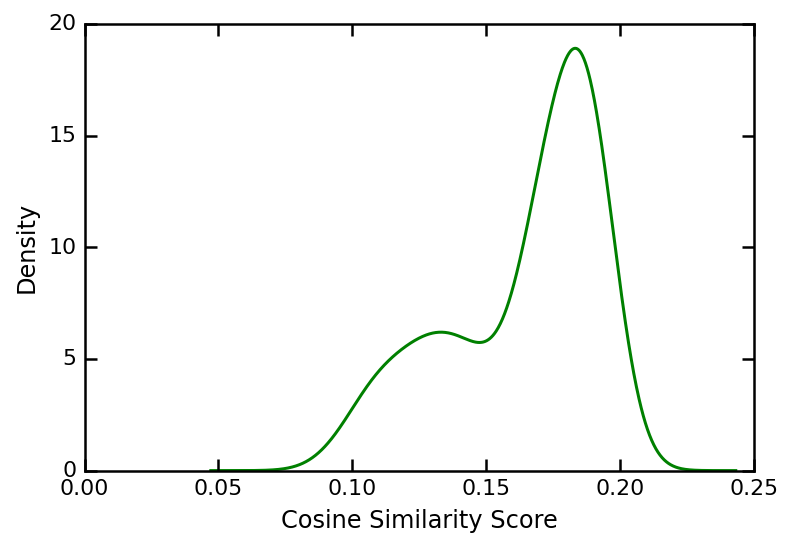

In [ ]:
# Textually similar dataset
import pandas as pds

df_sim_cos = df_sim["Average_Cos_Similarity_Score"];

skewness = df_sim_cos.skew();
kurt = df_sim_cos.kurt();
mean = df_sim_cos.mean()
median = df_sim_cos.median()
std = df_sim_cos.std()

print("Skewness:");

print(round(skewness,2)); 

print("kurt:");

print(round(kurt,2)); 

print("Mean:");

print(round(mean,2)); 

print("Median:");

print(round(median,2)); 

print("Standard Deviation:");

print(round(std,2)); 

#If skewness is less than -1 or greater than 1, the distribution is highly skewed.
#Kurtosis tells you the height and sharpness of the central peak, relative to that of a standard bell curve.
# Positive kurtosis indicates a relatively peaked distribution.


plt.figure()
df_sim.Average_Cos_Similarity_Score.plot.density(color='green')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Density')
plt.show()

Skewness:
-0.38
kurt:
-0.58
Mean:
0.03
Median:
0.03
Standard Deviation:
0.01


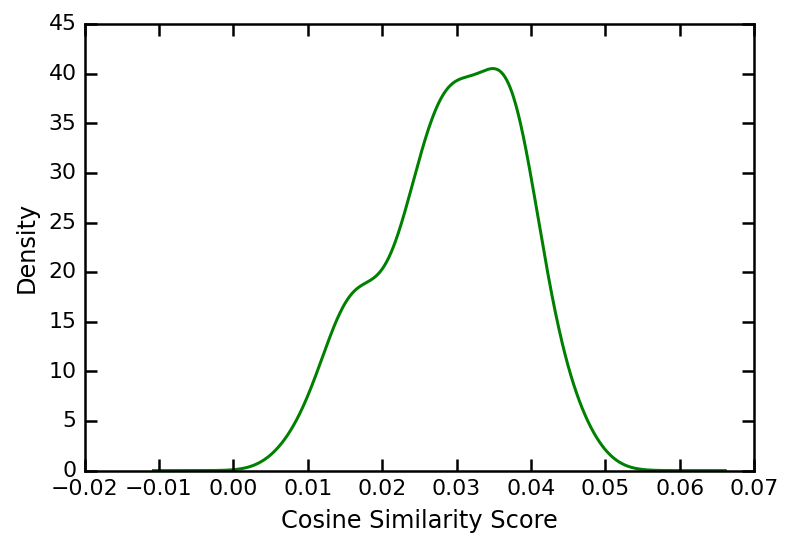

In [ ]:
# Textually dissimilar dataset
import pandas as pds

df_dissim_cos = df_dissim["Average_Cos_Similarity_Score"];

skewness = df_dissim_cos.skew();
kurt = df_dissim_cos.kurt();
mean = df_dissim_cos.mean()
median = df_dissim_cos.median()
std = df_dissim_cos.std()

print("Skewness:");

print(round(skewness,2)); 

print("kurt:");

print(round(kurt,2)); 

print("Mean:");

print(round(mean,2)); 

print("Median:");

print(round(median,2)); 

print("Standard Deviation:");

print(round(std,2)); 

#If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
# Negative kurtosis indicates a relatively flat distribution.
plt.figure()
df_dissim.Average_Cos_Similarity_Score.plot.density(color='green')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Density')
plt.show()

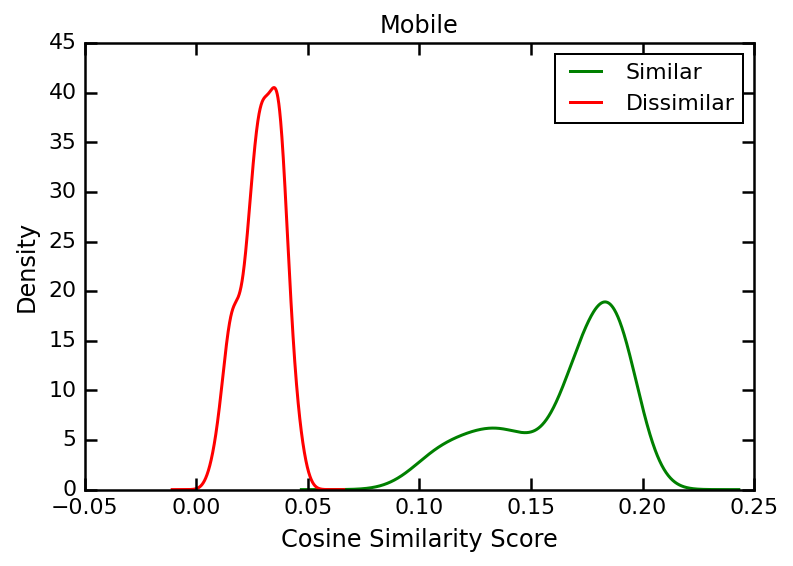

<Figure size 432x288 with 0 Axes>

In [ ]:
# importing package
import matplotlib.pyplot as plt
  
# create data
fig, ax = plt.subplots(2)

# plot lines
ax = plt.axes()
x1= df_sim.Average_Cos_Similarity_Score.plot.density(color='green')
y1= df_dissim.Average_Cos_Similarity_Score.plot.density(color='red')

ax.set_xlabel('Cosine Similarity Score')
ax.set_ylabel('Density')
ax.set_title('Mobile')

# plt.plot(x1)
# plt.plot(y1)


plt.legend(labels=['Similar', 'Dissimilar'])
plt.show()
plt.savefig('Mobile data dist.png')

## plotting the cosine similarity score difference


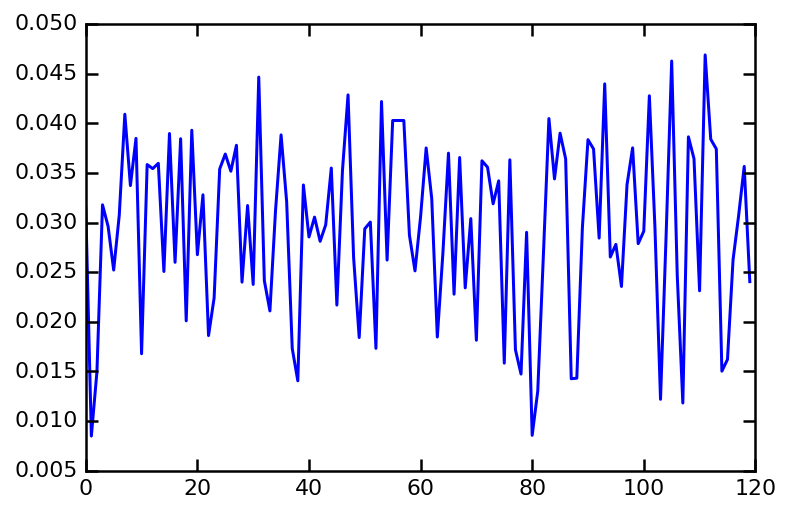

In [ ]:
df_dissim["Average_Cos_Similarity_Score"].plot()

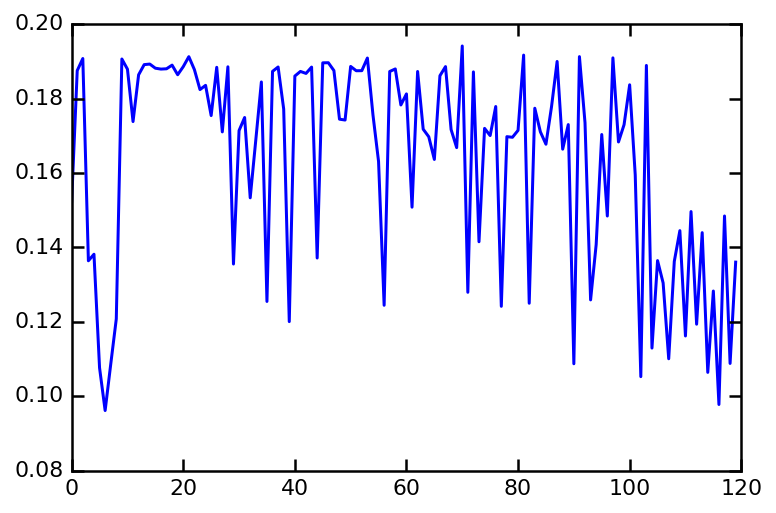

In [ ]:
df_sim["Average_Cos_Similarity_Score"].plot()

## Sorting by cosine value for sim & dis

In [ ]:
# Textually similar
df_sim_sort = df_sim.copy()
df_sim_sort

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Trigram,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Resolution,Updated,Bug Id,Description,Duplicate_Bug_Ids
0,1525,1536820,defect,Intermittent org.mozilla.geckoview.test.WebExt...,GeckoView,General,RESOLVED,0.124524,0.140884,0.152394,DUPLICATE,2021-07-30 18:58:23,1536820,markdown filed by nerli at mozilla com ...,1535913.0
1,2027,1466482,defect,Intermittent org.mozilla.geckoview.test.GeckoS...,GeckoView,General,RESOLVED,0.162806,0.174314,0.187525,DUPLICATE,2021-07-30 18:57:06,1466482,filed by apavel at mozilla com job id ...,1464351.0
2,2195,1677708,defect,Intermittent org.mozilla.geckoview.test.PanZoo...,GeckoView,General,RESOLVED,0.162700,0.174923,0.190772,DUPLICATE,2021-08-15 23:00:48,1677708,filed by malexandru at mozilla com pa...,1678895.0
3,2206,1703350,defect,Intermittent org.mozilla.geckoview.test.TextIn...,GeckoView,General,RESOLVED,0.099396,0.116423,0.136409,DUPLICATE,2021-12-12 22:00:43,1703350,filed by csabou at mozilla com parsed...,1681261.0
4,2241,1574141,defect,Intermittent org.mozilla.geckoview.test.Conten...,GeckoView,General,RESOLVED,0.094800,0.116148,0.138157,DUPLICATE,2021-07-30 18:59:53,1574141,filed by cbrindusan at mozilla com pa...,1564920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,4581,1633682,defect,Intermittent android shutdown hang | applicati...,GeckoView,General,RESOLVED,0.084962,0.106011,0.128275,DUPLICATE,2020-05-03 23:24:06,1633682,filed by aiakab at mozilla com parsed...,1631762.0
116,4753,1607767,defect,Crash in [@ java.lang.IllegalArgumentException...,GeckoView,General,RESOLVED,0.071775,0.084023,0.097770,DUPLICATE,2020-01-09 08:56:46,1607767,this bug is for crash report bp ...,1605991.0
117,5371,1618009,defect,Intermittent org.mozilla.geckoview.test.Conten...,GeckoView,General,RESOLVED,0.112931,0.131197,0.148447,DUPLICATE,2021-07-30 19:01:45,1618009,filed by nerli at mozilla com parsed ...,1617063.0
118,5493,1683402,defect,Intermittent org.mozilla.geckoview.test.PanZoo...,GeckoView,General,RESOLVED,0.066117,0.086331,0.108805,DUPLICATE,2021-07-30 19:04:11,1683402,filed by rmaries at mozilla com parse...,1643815.0


In [ ]:
#highest textual similarity in textual similar dataset
df_sim_sort= df_sim_sort.sort_values(by="Average_Cos_Similarity_Score", axis=0, ascending=False, inplace=False, kind='quicksort')
df_sim_sort.reset_index(drop=True, inplace=True)
df_sim_sort= df_sim_sort[:385]

In [ ]:
df_sim_sort= df_sim_sort.sample(frac=1).reset_index(drop=True)
df_sim_sort['Average_Cos_Similarity_Score'].values.tolist()

In [ ]:
# Textually dissimilar
df_dissim_sort = df_dissim.copy()
df_dissim_sort

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Trigram,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Resolution,Updated,Bug Id,Description,Duplicate_Bug_Ids
0,41,1655196,defect,High ratio of ERROR_NO_MINIDUMP_HEADER,GeckoView,General,RESOLVED,0.022843,0.024739,0.031502,DUPLICATE,2021-02-04 09:57:49,1655196,talking to gsvelto today he pointed out that ...,1644486.0
1,96,1482876,defect,"Storage crash: lastInsertedRowID, 32-bit only,...",Firefox for iOS,General,RESOLVED,0.007713,0.008110,0.008482,DUPLICATE,2018-08-14 08:14:18,1482876,the brief crash report thread name thread...,1482487.0
2,142,1331985,defect,Crash: [UIApplication _cachedSystemAnimationFe...,Firefox for iOS,Browser,RESOLVED,0.026783,0.029034,0.014968,DUPLICATE,2017-04-11 06:26:10,1331985,created attachment crash cu...,1355440.0
3,326,1494388,defect,Remaining mochitest and reftest failures in Te...,GeckoView,General,RESOLVED,0.024667,0.027100,0.031792,DUPLICATE,2019-02-06 14:40:46,1494388,jobs repo try tier revision demons...,1460411.0
4,692,1568667,enhancement,Extend ContentBlocking API to support Social T...,GeckoView,General,RESOLVED,0.022837,0.024508,0.029621,DUPLICATE,2019-12-04 10:59:55,1568667,stp is a new blocklist setting we need to supp...,1568295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,4737,1384704,enhancement,XCUIClipBoardTests for ipad,Firefox for iOS,Build & Test,RESOLVED,0.015520,0.017665,0.016202,DUPLICATE,2017-07-27 07:02:55,1384704,clipboard edge scenario for url comparison whi...,1378470.0
116,4778,1408405,defect,'All Tabs' button becomes transparent on Firef...,Firefox for iOS,General,RESOLVED,0.017745,0.020566,0.026256,DUPLICATE,2017-10-14 10:29:49,1408405,created attachment jpeg see screenshot ...,1406926.0
117,4823,1450490,defect,[Meta] Pushbox receive tab,Firefox for iOS,Sync,RESOLVED,0.016626,0.019321,0.030714,DUPLICATE,2018-07-16 13:53:06,1450490,this meta covers the work needed to receive ta...,1463826.0
118,4830,1338540,defect,[swift-3-regression] First Run Tour is present...,Firefox for iOS,General,RESOLVED,0.024579,0.026551,0.035665,DUPLICATE,2017-03-01 09:13:13,1338540,swift regression install the app st...,1338503.0


In [ ]:
# Lowest textual similarity in textual dissimilarity dataset
df_dissim_sort= df_dissim_sort.sort_values(by="Average_Cos_Similarity_Score", axis=0, ascending= True, inplace=False, kind='quicksort')
df_dissim_sort= df_dissim_sort[:385]
df_dissim_sort

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Trigram,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Resolution,Updated,Bug Id,Description,Duplicate_Bug_Ids
1,96,1482876,defect,"Storage crash: lastInsertedRowID, 32-bit only,...",Firefox for iOS,General,RESOLVED,0.007713,0.008110,0.008482,DUPLICATE,2018-08-14 08:14:18,1482876,the brief crash report thread name thread...,1482487.0
80,3573,1577309,defect,Crash in [@ js::TenuringTracer::moveToTenured],GeckoView,General,RESOLVED,0.007912,0.008380,0.008554,DUPLICATE,2019-08-29 08:37:13,1577309,this bug is for crash report bp ...,1577303.0
107,4511,1382732,enhancement,"Crash - ""Couldn't create or update [""tableList...",Firefox for iOS,Data Storage,RESOLVED,0.014549,0.015618,0.011812,DUPLICATE,2017-08-08 09:46:50,1382732,ios rk issues,1388147.0
103,4433,1457931,enhancement,Favicon missing from example.com in the TabsTray,Firefox for iOS,Browser,RESOLVED,0.009241,0.009732,0.012186,DUPLICATE,2018-04-30 08:56:08,1457931,placeholder favicon missing for sites with no ...,1446112.0
81,3578,1383629,defect,Crash in Storage: specialized BufferInconsiste...,Firefox for iOS,General,RESOLVED,0.010302,0.011988,0.013012,DUPLICATE,2017-11-14 07:39:05,1383629,created attachment wlwq xccrashpoint zip ...,1384771.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,2613,1457601,enhancement,Remove non-e10s mode,GeckoView,General,RESOLVED,0.026965,0.029096,0.042875,DUPLICATE,2021-08-04 15:02:11,1457601,i think it s too much of a burden to require t...,1650118.0
93,4132,1337437,defect,Integrate open source Leanplum SDK,Firefox for iOS,General,RESOLVED,0.021274,0.025759,0.043987,DUPLICATE,2017-05-04 21:11:34,1337437,this bug is about integrating the open source ...,1359911.0
31,2198,1641586,defect,GeckoWebExecutor.fetch returns 403 in private ...,GeckoView,General,RESOLVED,0.022514,0.028343,0.044671,DUPLICATE,2020-09-08 08:48:14,1641586,more detail and str can be found in the fenix...,1530022.0
105,4466,1346431,enhancement,Tapping on https lock icon should display info...,Firefox for iOS,General,RESOLVED,0.026953,0.029264,0.046287,DUPLICATE,2017-03-11 20:57:08,1346431,tapping on https lock icon should display info...,1109645.0


In [ ]:
df_dissim_sort= df_dissim_sort.sample(frac=1).reset_index(drop=True)
df_dissim_sort['Average_Cos_Similarity_Score'].values.tolist()